Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_dct_int.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

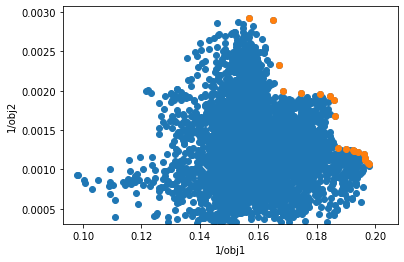

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0008083034933599558


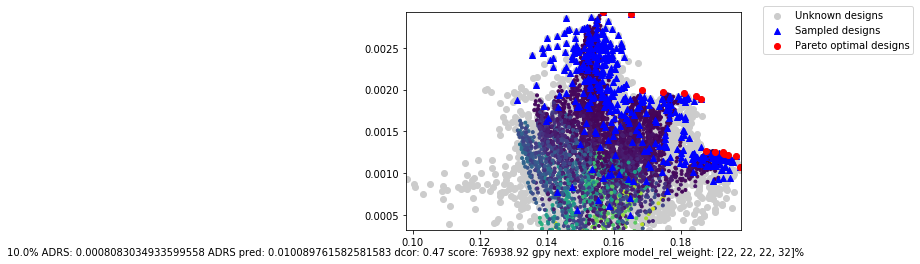

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1365, 1493, 3413, 1367, 1877,   87,  252, 1283, 3132, 3843, 3907,
       1795, 2819, 3841, 1539, 3324,  771,  259,  515,  787, 3331, 3587,
          3,  775, 1027, 2307, 3075, 2051,  835,    0,  768,  256, 1024,
       1280, 3072, 2048,    1,  512, 3374, 3276, 1088,   16, 1036, 3123,
       3280,  192, 1040,    4, 3328,   64, 3104, 2304,   32,   48,  560,
       1792,  272, 1216, 4032, 3267,  195, 1536, 3120, 2560, 3840, 2064,
        304, 1028, 3584, 2816,  276, 1217, 1219,    7,  963, 2052, 2848,
        528,  260,  264,  780,   20,  520, 1296,  516, 1284, 2308,   80,
        144,  240,  320,  336, 3136,  160, 3087,   96, 2112, 1104, 1344,
       1856, 3076, 3088,   68, 2688, 3392,  208, 2852, 2912, 2624,   84,
        324, 1540, 1044, 3872,  716, 3855,  975,    8, 3008,  204, 2880,
       1992, 1807,  816,  772, 3315, 2216, 3112,  243, 1416,  224,  200,
       2756, 3891,  920,  136, 3279, 2368, 1348,  784, 1092, 1600,  576,
       2128, 2068, 1360, 1056, 2320, 3616, 1552,  8